<a href="https://colab.research.google.com/github/Vakhranev/MDB/blob/main/%D0%AD%D0%BA%D1%81%D0%BF%D0%B5%D1%80%D0%B8%D0%BC%D0%B5%D0%BD%D1%82%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pymorphy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 25.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=e77a24c4cd5f3d719608c055c93ad9a13147d085de65368f8e742e5252b13150
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


Среднее количество гласных букв для уровня A1: 1.75


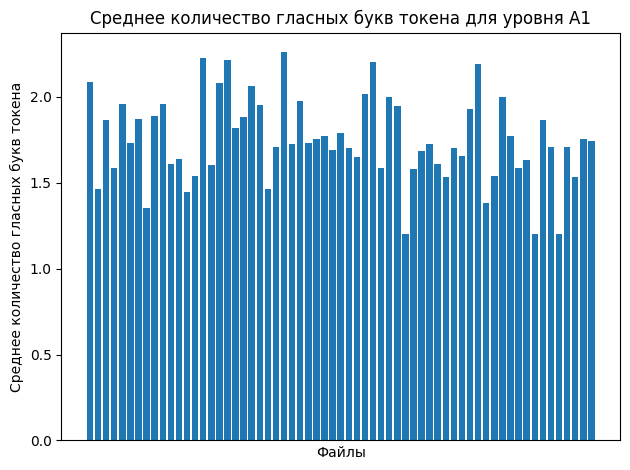

Среднее количество гласных букв для уровня A2: 1.83


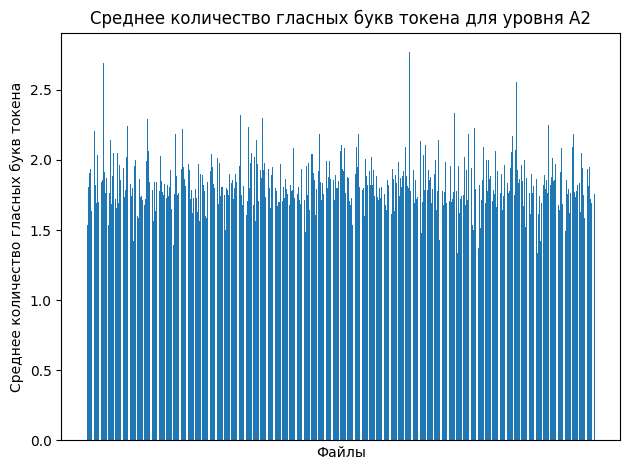

Среднее количество гласных букв для уровня B1: 1.94


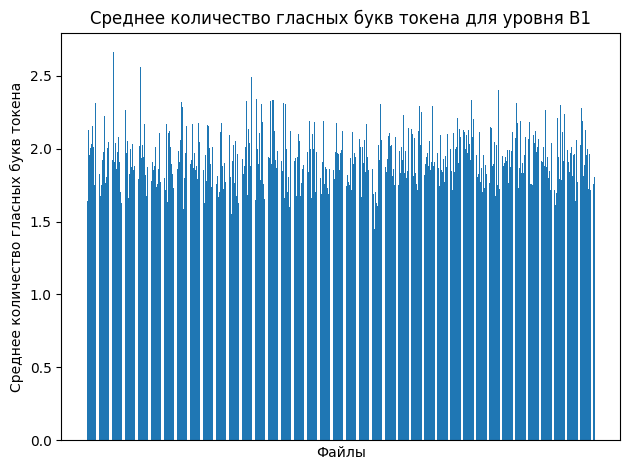

Среднее количество гласных букв для уровня B2: 2.04


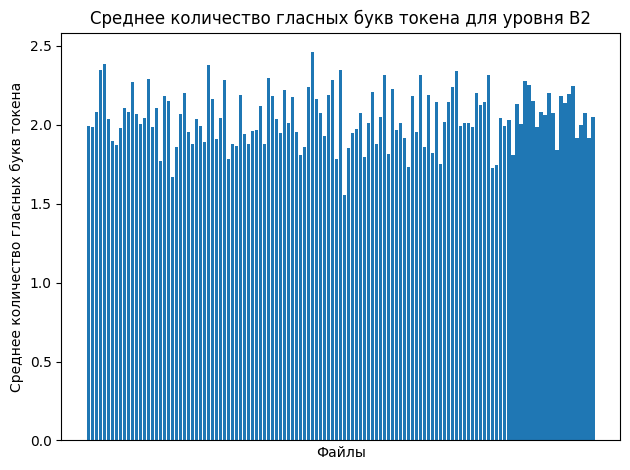

In [4]:
import os
import glob
import pymorphy2
import matplotlib.pyplot as plt

# Создаем экземпляр класса MorphAnalyzer для работы с морфологией русского языка
morph = pymorphy2.MorphAnalyzer()

# Путь к папке с уровнями CEFR
cefr_levels = ["A1", "A2", "B1", "B2"]

# Обработка каждого уровня CEFR
for cefr_level in cefr_levels:
    folder_path = f"/content/Students_texts/{cefr_level}"
    file_list = glob.glob(os.path.join(folder_path, "*.txt"))

    avg_vowel_counts = []

    # Обработка каждого файла в текущем уровне CEFR
    for file_path in file_list:
        with open(file_path, 'r') as file:
            text = file.read()
            tokens = text.split()

            total_vowel_count = 0
            token_count = 0

            # Вычисляем количество гласных букв для каждого токена
            for token in tokens:
                parsed_token = morph.parse(token)[0]

                # Проверяем, есть ли нормализованная форма слова
                if parsed_token.normal_form is not None:
                    normalized_word = parsed_token.normal_form
                    vowel_count = sum(letter in 'аеёиоуыэюя' for letter in normalized_word.lower())
                    total_vowel_count += vowel_count
                    token_count += 1

            # Среднее количество гласных букв для файла
            avg_vowel_count = total_vowel_count / token_count if token_count > 0 else 0
            avg_vowel_counts.append(avg_vowel_count)

    # Среднее значение для текущего уровня CEFR
    avg_for_cefr = sum(avg_vowel_counts) / len(avg_vowel_counts)
    print(f"Среднее количество гласных букв для уровня {cefr_level}: {avg_for_cefr:.2f}")

    # Создание столбчатой диаграммы для текущего уровня CEFR
    plt.bar(range(len(file_list)), avg_vowel_counts)
    plt.xlabel('Файлы')
    plt.ylabel('Среднее количество гласных букв токена')
    plt.title(f'Среднее количество гласных букв токена для уровня {cefr_level}')
    plt.xticks([])
    plt.tight_layout()
    plt.show()